In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

movies = pd.read_csv("IMDb movies.csv")
moviesdf = pd.DataFrame(movies)

/Users/ashleystojak/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
moviesdf.drop(columns=['budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore'], inplace=True, axis=1)

In [3]:
# filling in the na as 0 for reviews as reviews are on a scale of 0-10
moviesdf["reviews_from_users"].fillna(0, inplace=True)
moviesdf["reviews_from_critics"].fillna(0, inplace=True)
moviesdf.isnull().sum()

imdb_title_id              0
title                      0
original_title             0
year                       0
date_published             0
genre                      0
duration                   0
country                   64
language                 833
director                  87
writer                  1572
production_company      4455
actors                    69
description             2115
avg_vote                   0
votes                      0
reviews_from_users         0
reviews_from_critics       0
dtype: int64

In [4]:
# filling in the na for the attributes that should remain as strings
# all NA are UNKNOWN
moviesdf.fillna("UNKNOWN", inplace=True)
moviesdf.isnull().sum()

imdb_title_id           0
title                   0
original_title          0
year                    0
date_published          0
genre                   0
duration                0
country                 0
language                0
director                0
writer                  0
production_company      0
actors                  0
description             0
avg_vote                0
votes                   0
reviews_from_users      0
reviews_from_critics    0
dtype: int64

In [5]:
ratings = pd.read_csv("IMDb ratings.csv")
ratingsdf = pd.DataFrame(ratings)

In [6]:
ratingsdf.drop(columns=['allgenders_0age_avg_vote',
                         'allgenders_0age_votes',
                         'allgenders_18age_avg_vote',
                         'allgenders_18age_votes',
                         'allgenders_30age_avg_vote',
                         'allgenders_30age_votes',
                         'allgenders_45age_avg_vote',
                         'allgenders_45age_votes',
                         'males_0age_avg_vote',
                         'males_0age_votes',
                         'males_18age_avg_vote',
                         'males_18age_votes',
                         'males_30age_avg_vote',
                         'males_30age_votes', 
                         'males_45age_avg_vote', 
                         'males_45age_votes', 
                         'females_0age_avg_vote', 
                         'females_0age_votes', 
                         'females_18age_avg_vote', 
                         'females_18age_votes', 
                         'females_30age_avg_vote', 
                         'females_30age_votes', 
                         'females_45age_avg_vote', 
                         'females_45age_votes', 
                         'top1000_voters_rating', 
                         'top1000_voters_votes', 
                         'us_voters_rating', 
                         'us_voters_votes', 
                         'non_us_voters_rating', 
                         'non_us_voters_votes'], inplace=True, axis=1)

In [7]:
ratingsdf.fillna(0, inplace=True)
ratingsdf.isnull().sum()

imdb_title_id               0
weighted_average_vote       0
total_votes                 0
mean_vote                   0
median_vote                 0
votes_10                    0
votes_9                     0
votes_8                     0
votes_7                     0
votes_6                     0
votes_5                     0
votes_4                     0
votes_3                     0
votes_2                     0
votes_1                     0
males_allages_avg_vote      0
males_allages_votes         0
females_allages_avg_vote    0
females_allages_votes       0
dtype: int64

In [8]:
# merging the two merged dataframes into one complete dataframe based on 'imdb_title_id'
complete_df = pd.merge( moviesdf, ratingsdf, on='imdb_title_id', how='outer')

# removes all movies that do not have USA as one of the countries
complete_df.loc[ (complete_df['country'].str.contains('USA') == False), 'country'] = np.NaN
complete_df.dropna(inplace=True)
print(complete_df.isnull().sum()) # all n/a should be dropped

complete_df['avg_vote'] = complete_df['avg_vote'].round()
complete_df['mean_vote'] = complete_df['mean_vote'].round()

imdb_title_id               0
title                       0
original_title              0
year                        0
date_published              0
genre                       0
duration                    0
country                     0
language                    0
director                    0
writer                      0
production_company          0
actors                      0
description                 0
avg_vote                    0
votes                       0
reviews_from_users          0
reviews_from_critics        0
weighted_average_vote       0
total_votes                 0
mean_vote                   0
median_vote                 0
votes_10                    0
votes_9                     0
votes_8                     0
votes_7                     0
votes_6                     0
votes_5                     0
votes_4                     0
votes_3                     0
votes_2                     0
votes_1                     0
males_allages_avg_vote      0
males_alla

In [9]:
### Splitting Genres

col = set()

a = list(complete_df["genre"])

for w in a:
    b = set(w.split(", "))
    col = col.union(b)    

for g in col:
    complete_df[g] = 0


for g in col:
    complete_df.loc[complete_df['genre'].str.contains(g),g] = 1
    
complete_df.head(10)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,Adventure,Animation,News,Western,Romance,Thriller,Fantasy,Musical,Horror,Adult
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,0,0,0,0,1,0,0,0,0,0
3,tt0002101,Cleopatra,Cleopatra,1912,11/13/12,"Drama, History",100,USA,English,Charles L. Gaskill,...,0,0,0,0,0,0,0,0,0,0
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,0,0,0,0,0,0,0,0,0,0
9,tt0002461,Richard III,Richard III,1912,10/15/12,Drama,55,"France, USA",English,"André Calmettes, James Keane",...,0,0,0,0,0,0,0,0,0,0
17,tt0003167,Amore di madre,"Home, Sweet Home",1914,5/17/14,Drama,55,USA,English,D.W. Griffith,...,0,0,0,0,0,0,0,0,0,0
19,tt0003471,Traffic in Souls,Traffic in Souls,1913,11/24/13,"Crime, Drama",88,USA,English,George Loane Tucker,...,0,0,0,0,0,0,0,0,0,0
22,tt0003643,The Avenging Conscience: or 'Thou Shalt Not Kill',The Avenging Conscience: or 'Thou Shalt Not Kill',1914,8/24/14,"Crime, Drama, Horror",78,USA,English,D.W. Griffith,...,0,0,0,0,0,0,0,0,1,0
23,tt0003657,The Bargain,The Bargain,1914,12/3/14,Western,70,USA,English,Reginald Barker,...,0,0,0,1,0,0,0,0,0,0
25,tt0003772,Cinderella,Cinderella,1914,12/28/14,"Fantasy, Drama",52,USA,English,James Kirkwood,...,0,0,0,0,0,0,1,0,0,0
28,tt0003973,A Florida Enchantment,A Florida Enchantment,1914,9/4/16,Comedy,63,USA,English,Sidney Drew,...,0,0,0,0,0,0,0,0,0,0


In [10]:
col = set()

a = list(complete_df["country"])

for w in a:
    b = set(w.split(", "))
    col = col.union(b)    

for g in col:
    complete_df[g] = 0


for g in col:
    complete_df.loc[complete_df['country'].str.contains(g),g] = 1
    
# complete_df.head(10)
complete_df.info(-20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34325 entries, 0 to 85839
Data columns (total 200 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    imdb_title_id                   object 
 1    title                           object 
 2    original_title                  object 
 3    year                            object 
 4    date_published                  object 
 5    genre                           object 
 6    duration                        int64  
 7    country                         object 
 8    language                        object 
 9    director                        object 
 10   writer                          object 
 11   production_company              object 
 12   actors                          object 
 13   description                     object 
 14   avg_vote                        float64
 15   votes                           int64  
 16   reviews_from_users              float64
 17   reviews_fr

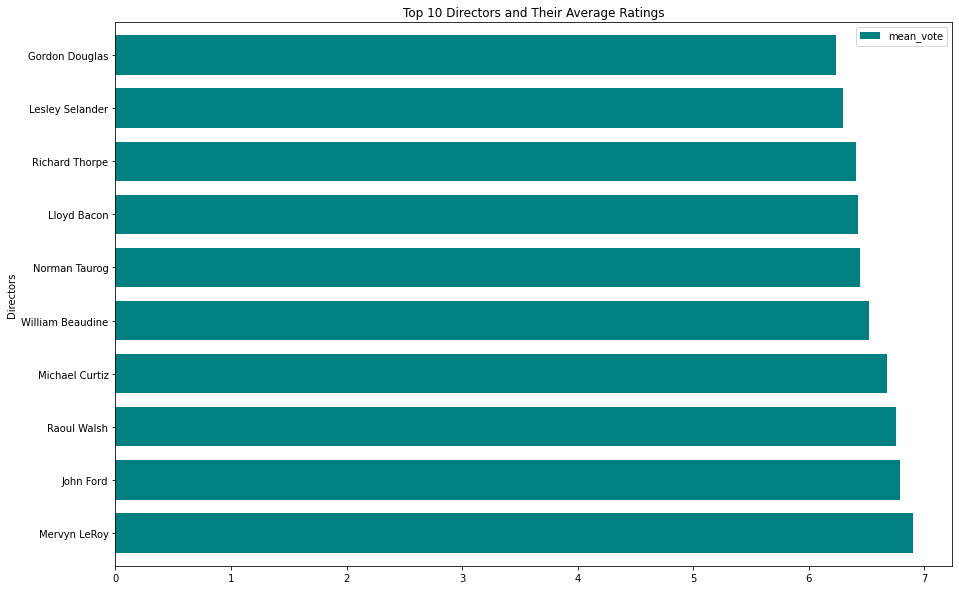

In [11]:
# to get the mena of the avg votes
directors_mean_df = complete_df.groupby(['director'])[['mean_vote']].mean()

# to get the total movies they worked on
directors_total_df = complete_df.groupby(['director'])[['title']].count()

all_directors_df = pd.concat([directors_mean_df, directors_total_df], axis=1)
all_directors_df = all_directors_df.sort_values(['title'], ascending = False)

top_ten_directors = all_directors_df.head(10)

top_ten_directors = top_ten_directors.sort_values(['mean_vote'], ascending = False)
top_ten_directors.plot.barh(figsize=(15,10), y='mean_vote', width=.75, xlabel="Directors", title="Top 10 Directors and Their Average Ratings", color=["teal"]);


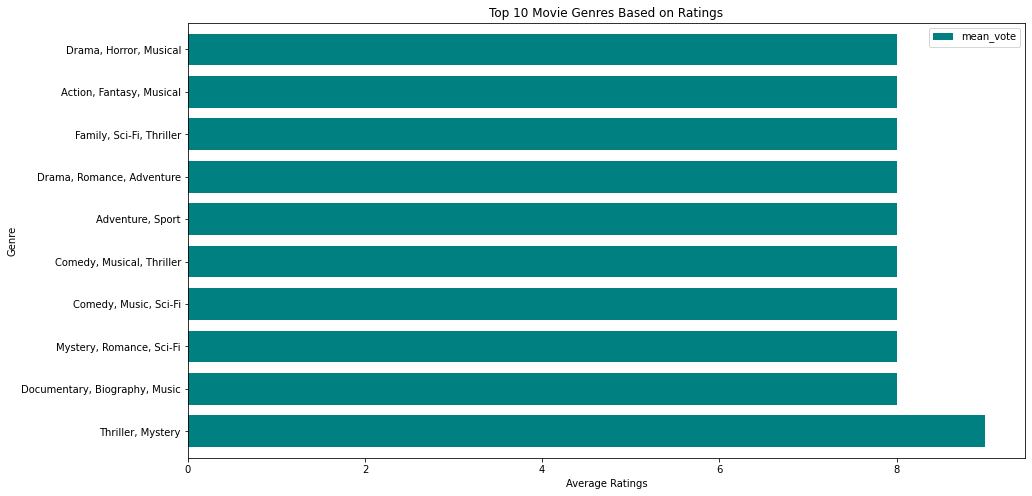

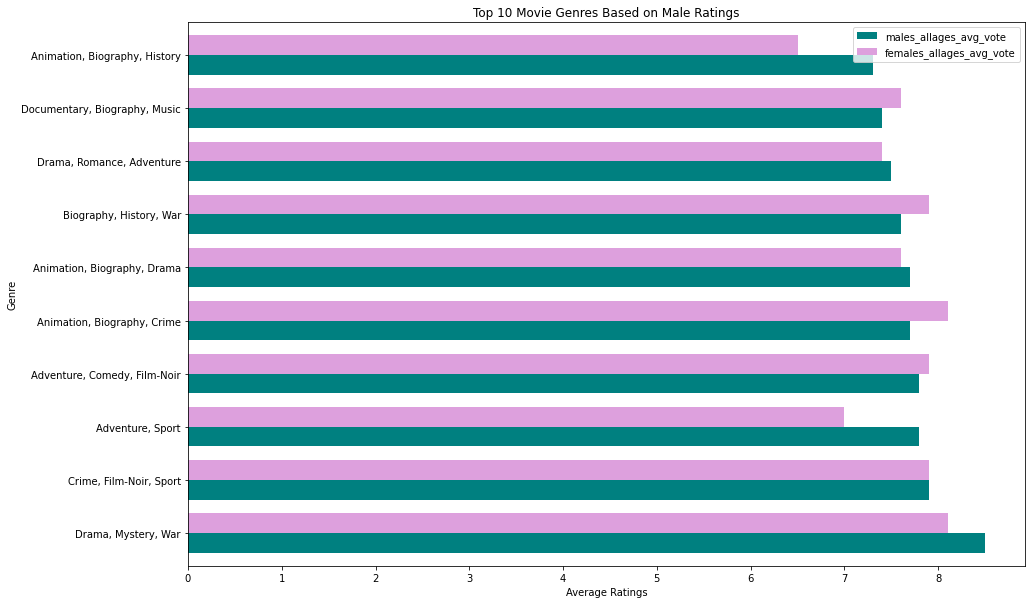

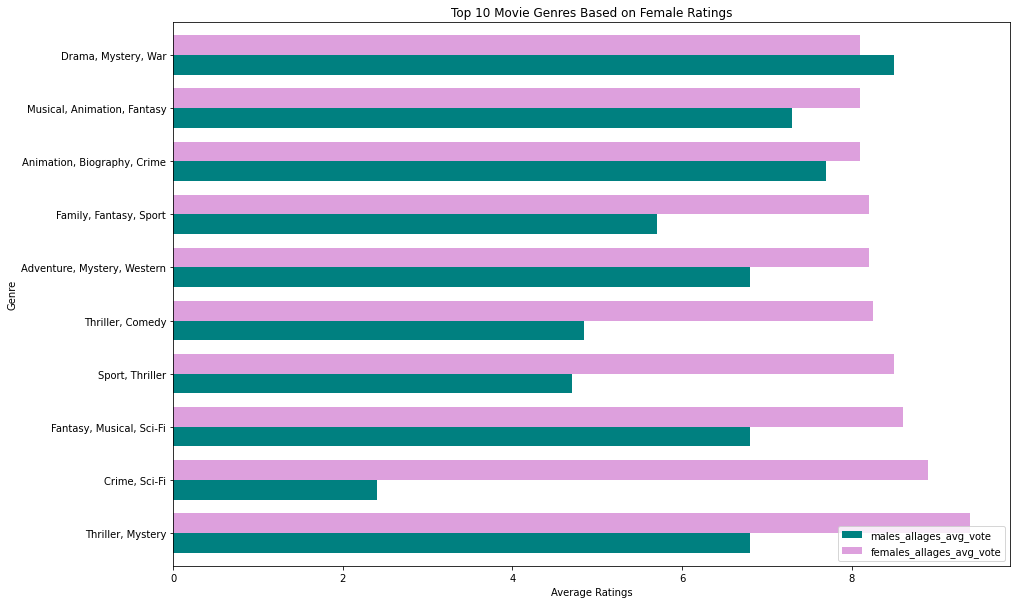

In [12]:
genredf = complete_df.groupby(['genre'])[['mean_vote']].mean().reset_index();
genredf = genredf.sort_values(['mean_vote'], ascending = False);

toptengenre = genredf.head(10)

toptengenre.plot.barh(figsize=(15,8), x="genre", width=.75, xlabel="Genre", title="Top 10 Movie Genres Based on Ratings", color="teal");
plt.xlabel("Average Ratings")
plt.xticks(rotation='horizontal');


male_female_genre = complete_df.groupby(['genre'])[['males_allages_avg_vote', 'females_allages_avg_vote']].mean().reset_index();
male_genre = male_female_genre.sort_values(['males_allages_avg_vote'], ascending = False);
female_genre = male_female_genre.sort_values(['females_allages_avg_vote'], ascending = False);


male_genre = male_genre.head(10)
male_genre.plot.barh(figsize=(15,10), x="genre", width=.75, xlabel="Genre", title="Top 10 Movie Genres Based on Male Ratings", color=["teal", "plum"]);
plt.xlabel("Average Ratings");


female_genre = female_genre.head(10)
female_genre.plot.barh(figsize=(15,10), x="genre", width=.75, xlabel="Genre", title="Top 10 Movie Genres Based on Female Ratings", color=["teal", "plum"]);
plt.xlabel("Average Ratings");

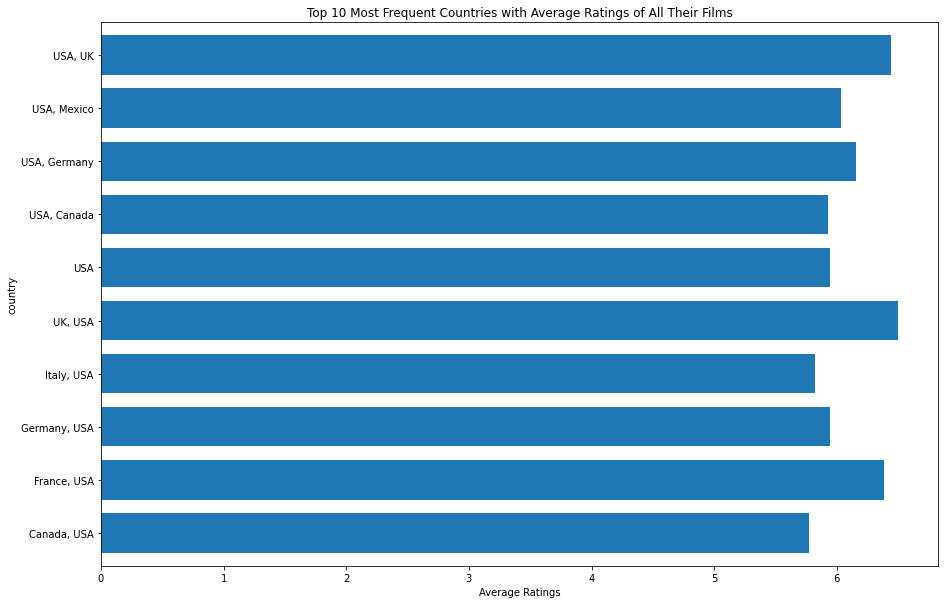

In [13]:
## EDA, Looking For Relation between Country Origin & Rating
## ---------------------------------------------------------

## Finding Most Used Countries (top 10)
most_freq_countries = list(complete_df['country'].value_counts()[:10].index)

## Shrink Dataframe by Top10 Countries
df = complete_df[complete_df['country'].isin(most_freq_countries)]

## Calculating Avg Rating per Countries
s = df.groupby(by=['country'])['mean_vote'].sum() #sum
c = df['country'].value_counts()                  #counts

s.sort_index(inplace=True)
c.sort_index(inplace=True)

avg_rating_countries = s/c

## Graphing Findings
avg_rating_countries.plot.barh(figsize=(15,10), width=.75, title="Top 10 Most Frequent Countries with Average Ratings of All Their Films")
plt.xlabel("Average Ratings")
plt.show()

Text(0.5, 0, 'Counts')

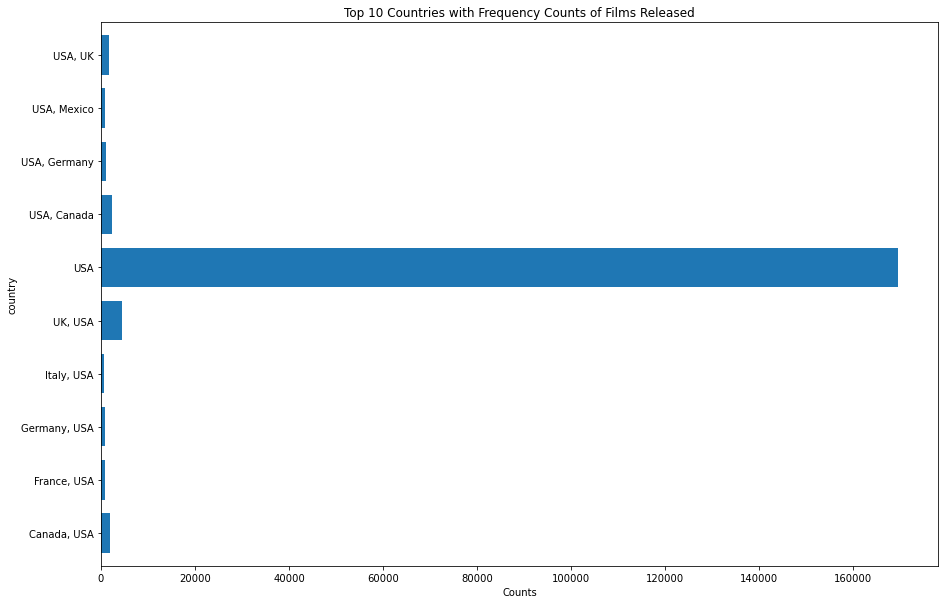

In [14]:
## EDA, Looking For Relation between Country Origin & Rating (Continued)
## ---------------------------------------------------------

#Plotting Freq Counts
s.plot.barh(figsize=(15,10), width=.75, title="Top 10 Countries with Frequency Counts of Films Released")
plt.xlabel("Counts")

<ipython-input-15-f1fe7e832fe4>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(most_freq_countries)


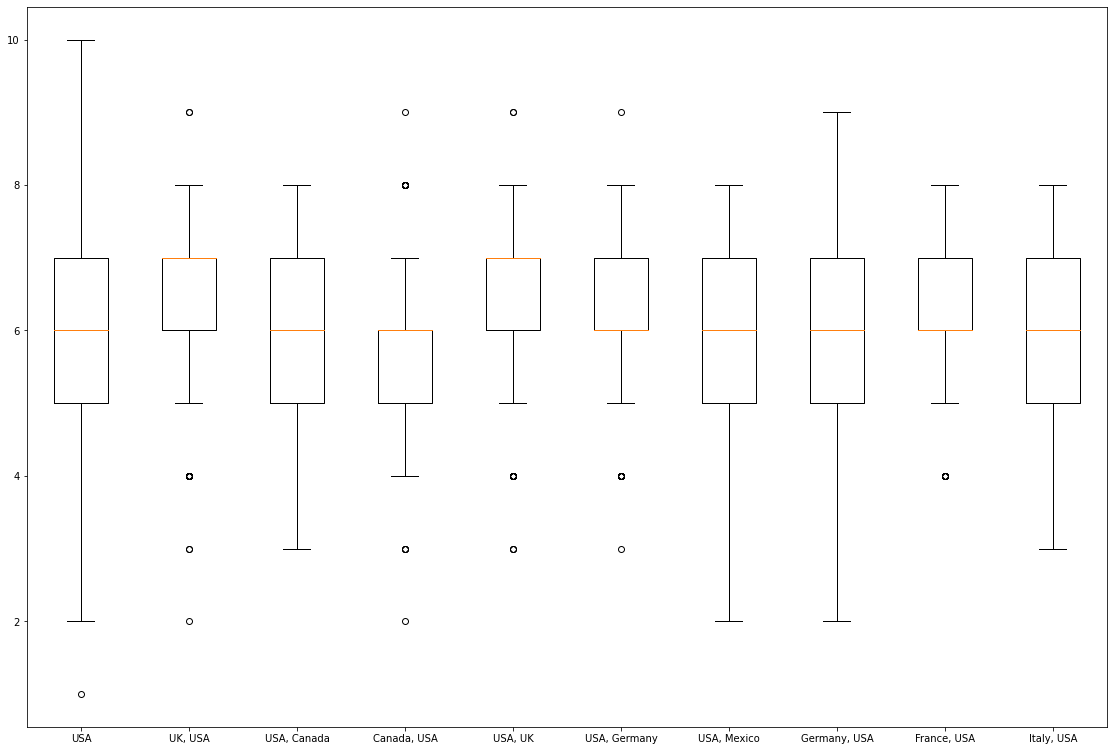

In [15]:
## EDA, Looking For Relation between Country Origin & Rating (Continued)
## ---------------------------------------------------------

fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
country = []
#Plotting Quartile Info
for i in most_freq_countries:
    df_ = df[df['country'] == i]
    country.append(df_['mean_vote'])
    
ax.set_xticklabels(most_freq_countries)
bp = ax.boxplot(country)

plt.show()

In [16]:
complete_df.to_csv("clean_data.csv", sep=',')


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

#understand what the fuck this code is doing, cause idk
def encode_target(df, target_column):

    df_mod = df.copy()
    targets = df_mod['mean_vote'].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["Target"] = df_mod[target_column].replace(map_to_int)

    return (df_mod, targets)

X,y = encode_target(complete_df, "mean_vote")
clf = DecisionTreeClassifier(criterion = 'entropy')